In [1]:
import pandas as pd
import numpy as np

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

#### the statement below ask matplotlib to use the 'ggplot' style
#### you should consider using that
plt.style.use('ggplot')

# pip install xlrd --user

In [2]:
df = pd.read_excel('Competition1_raw_data.xlsx',na_values = "-" ,index_col = 'I1')
df.head()

,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
I1,,,,,,,,,,,,,,,,,,,,,
AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,0.029074,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,-0.013352,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,0.020715,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,0.020023,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,-0.034895,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0


In [3]:
# source: https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe
# a function that provides a summary of the  missing values in a dataset

def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df)

Your selected dataframe has 21 columns and 682 Rows.
There are 20 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
C7,0,72,10.6,72,10.6,float64
C3,5,36,5.3,41,6.0,float64
P(1Day),4,22,3.2,26,3.8,float64
C1,0,22,3.2,22,3.2,float64
C2,93,22,3.2,115,16.9,float64
C4,0,22,3.2,22,3.2,float64
P(H),1,10,1.5,11,1.6,float64
P(L),0,10,1.5,10,1.5,float64
I3,0,8,1.2,8,1.2,object
C6,0,6,0.9,6,0.9,float64


I2          object
I3          object
P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
C1         float64
C2         float64
C3         float64
C4         float64
C5         float64
C6         float64
C7         float64
T1         float64
T2         float64
T3         float64
T4         float64
T5         float64
S1         float64
S2         float64
S3         float64
dtype: object

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,677.000000,672.000000,672.000000,660.000000,660.000000,660.000000,646.000000,660.000000,6.760000e+02,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,0.859091,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,6.053731,6.653429,5.835646,73.234948,152.817467,0.348192,162.666532,0.033318,1.043764e+08,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,10.000000,12.500000,11.000000,11.000000,85.000000,1.000000,-0.852500,-0.013927,1.871417e+07,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,1.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,17.000000,17.000000,15.000000,20.485000,155.250000,1.000000,0.470000,0.031571,4.980786e+07,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8221f76a0>,
      dtype=object)

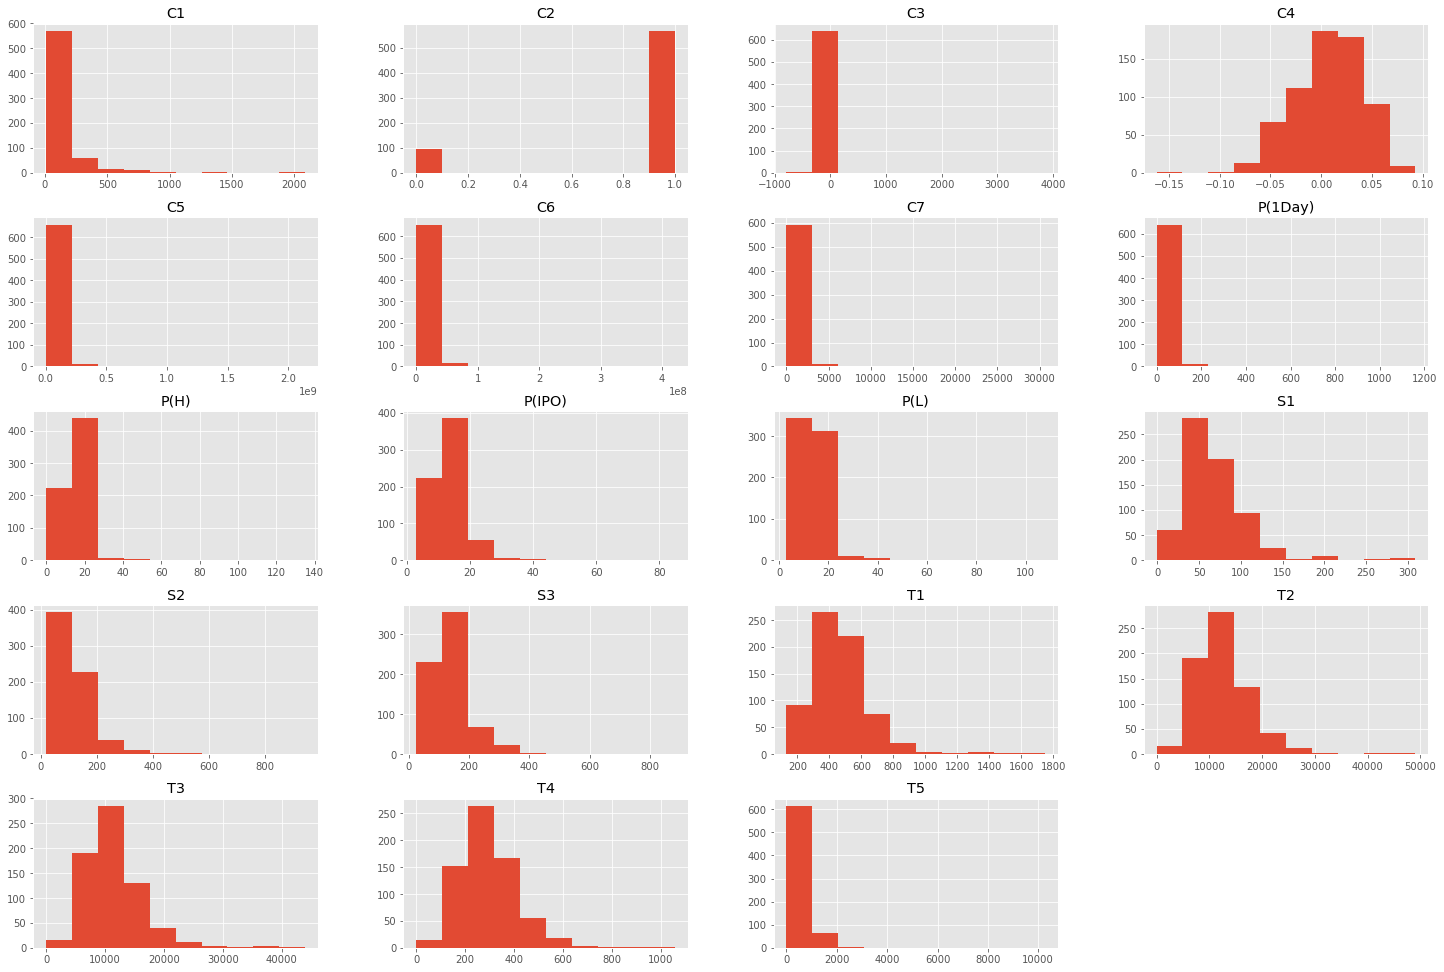

In [4]:
display(df.dtypes)
display(df.describe())
display(df.hist( figsize = (25,17)))

In [5]:
df.columns

Index(['I2', 'I3', 'P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'C1', 'C2', 'C3', 'C4',
       'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3'],
      dtype='object')

# Imputation

## Taking a look at the P(1day) col

In [6]:
#see what missing in the col P(1Day) with the index of l1
df[df['P(1Day)'].isna()]['P(1Day)']

I1
ADKU   NaN
BLT    NaN
CELM   NaN
CIL    NaN
ELMD   NaN
ESEA   NaN
EURX   NaN
GSL    NaN
HPJ    NaN
KFI    NaN
LZEN   NaN
NAUH   NaN
NBY    NaN
NIV    NaN
RCH    NaN
RGLS   NaN
RNIN   NaN
STRL   NaN
TRMM   NaN
TZOO   NaN
TZYM   NaN
ZGNX   NaN
Name: P(1Day), dtype: float64

In [7]:
df[df['P(1Day)'].isna()]['P(1Day)'].index

Index(['ADKU', 'BLT', 'CELM', 'CIL', 'ELMD', 'ESEA', 'EURX', 'GSL', 'HPJ',
       'KFI', 'LZEN', 'NAUH', 'NBY', 'NIV', 'RCH', 'RGLS', 'RNIN', 'STRL',
       'TRMM', 'TZOO', 'TZYM', 'ZGNX'],
      dtype='object', name='I1')

In [8]:
#how to change each value in the list above, if we wanted to change them by hand or drop them
#df['P(1Day)'].loc['ADKU'] = 1



# SIC code 
## going to the sec and looking up the missing sic code

In [9]:
df[df['I3'].isna()]['I3']

I1
ADKU    NaN
BLT     NaN
GSL     NaN
KFI     NaN
NAUH    NaN
RCH     NaN
TRMM    NaN
TZOO    NaN
Name: I3, dtype: object

In [10]:
data = df.copy()


In [11]:
data['I3_Imput'] = data['I3']

data['I3_Imput']['ADKU']

nan

In [12]:
#i coudn't find the sic code on this website: https://cage.report/NCAGE/4TQ01
#but i found the naics code and then looked what it the corresponding sic code
# https://siccode.com/naics-code/623110/nursing-care-facilities-skilled-nursing-facilities

data['I3_Imput'] = data['I3']

data['I3_Imput']['ADKU'] = 8051
#https://siccode.com/business/blount-international-inc-1
data['I3_Imput']['BLT'] = 3199
#https://www.nasdaq.com/market-activity/ipos/overview?dealId=622042-37804
#https://siccode.com/sic-code/4812/radiotelephone-communications
data['I3_Imput']['GSL'] = 4412

#https://sec.report/Ticker/KFI
data['I3_Imput']['KFI'] = 6199

#https://sec.report/Ticker/NAUH
data['I3_Imput']['NAUH'] = 8200


#https://sec.report/Ticker/RCH
data['I3_Imput']['RCH'] = 8711
#https://sec.report/Ticker/TRMM
data['I3_Imput']['TRMM'] = 7200
#https://sec.report/Ticker/TZOO
data['I3_Imput']['TZOO'] = 7373


# companies that have two or more sic code will be changed to the primary sic code taken from the sec website 
#https://sec.report/Ticker/DLB
data['I3_Imput']['DLB']  = 6794
#https://sec.report/Ticker/DTSI
data['I3_Imput']['DTSI']  = 6794

#https://sec.report/Ticker/RLD
data['I3_Imput']['RLD']  = 3663
#https://sec.report/Ticker/UPG
data['I3_Imput']['UPG']  = 5063






/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/tljh/user/lib/python3.6/site-packa

In [13]:
data.head()

,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,...,C7,T1,T2,T3,T4,T5,S1,S2,S3,I3_Imput
I1,,,,,,,,,,,,,,,,,,,,,
AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,0.029074,...,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0,3674
ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,-0.013352,...,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0,2834
ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,0.020715,...,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0,2834
ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,0.020023,...,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0,2834
ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,-0.034895,...,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0,4492


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg" style="undefined;table-layout: fixed; width: 610px">
<colgroup>
<col style="width: 180px">
<col style="width: 430px">
</colgroup>
  <tr>
    <th class="tg-baqh">Range of SIC Codes</th>
    <th class="tg-baqh">Division</th>
  </tr>
  <tr>
    <td class="tg-0lax">0100-0999</td>
    <td class="tg-0lax">Agriculture, Forestry and Fishing</td>
  </tr>
  <tr>
    <td class="tg-0lax">1000-1499</td>
    <td class="tg-0lax">Mining</td>
  </tr>
  <tr>
    <td class="tg-0lax">1500-1799</td>
    <td class="tg-0lax">Construction</td>
  </tr>
  <tr>
    <td class="tg-0lax">1800-1999</td>
    <td class="tg-0lax">not used</td>
  </tr>
  <tr>
    <td class="tg-0lax">2000-3999</td>
    <td class="tg-0lax">Manufacturing</td>
  </tr>
  <tr>
    <td class="tg-0lax">4000-4999</td>
    <td class="tg-0lax">Transportation, Communications, Electric, Gas and Sanitary service</td>
  </tr>
  <tr>
    <td class="tg-0lax">5000-5199</td>
    <td class="tg-0lax">Wholesale Trade</td>
  </tr>
  <tr>
    <td class="tg-0lax">5200-5999</td>
    <td class="tg-0lax">Retail Trade</td>
  </tr>
  <tr>
    <td class="tg-0lax">6000-6799</td>
    <td class="tg-0lax">Finance, Insurance and Real Estate</td>
  </tr>
  <tr>
    <td class="tg-0lax">7000-8999</td>
    <td class="tg-0lax">Services</td>
  </tr>
  <tr>
    <td class="tg-0lax">9100-9729</td>
    <td class="tg-0lax">Public Administration</td>
  </tr>
  <tr>
    <td class="tg-0lax">9900-9999</td>
    <td class="tg-0lax">Nonclassifiable</td>
  </tr>
</table>

In [14]:
#bining the l3 col to divisions
def division_func(div) :
    #div = data['I3']
    if div <= 999:
        return 'Agriculture, Forestry and Fishing'
    elif div >= 1000 and div <= 1499:
        return 'Mining'
    elif div >= 1500 and div <= 1799:
        return 'Construction'
    elif div >= 2000 and div <= 3999:
        return 'Manufacturing'
    elif div >= 4000 and div <= 4999:
        return 'Transportation, Communications, Electric, Gas and Sanitary service'
    elif div >= 5000 and div <= 5199:
        return 'Wholesale Trade'
    elif div >= 5200 and div <= 5999:
        return 'Retail Trade'
    elif div >= 6000 and div <= 6799:
        return 'Finance, Insurance and Real Estate'
    elif div >= 7000 and div <= 8999:
        return 'Services'
    elif div >= 9100 and div <= 9729:
        return 'Public Administration'
    elif div >= 9900 and div <= 9999:
        return 'Nonclassifiable'
        


In [15]:
data.isna().sum()

I2           0
I3           8
P(IPO)       5
P(H)        10
P(L)        10
P(1Day)     22
C1          22
C2          22
C3          36
C4          22
C5           6
C6           6
C7          72
T1           1
T2           1
T3           1
T4           1
T5           1
S1           1
S2           1
S3           1
I3_Imput     0
dtype: int64

In [16]:
data['I3_Imput']= data['I3_Imput'].astype(int)

In [17]:
data['division'] = data['I3_Imput'].apply(division_func )
data['division'].value_counts()

Manufacturing                                                         309
Services                                                              206
Transportation, Communications, Electric, Gas and Sanitary service     60
Retail Trade                                                           48
Mining                                                                 31
Wholesale Trade                                                        14
Finance, Insurance and Real Estate                                      8
Agriculture, Forestry and Fishing                                       2
Construction                                                            2
Name: division, dtype: int64

In [18]:
data[data['division'].isna()]['division']


I1
EXLS    None
G       None
Name: division, dtype: object

In [19]:
#https://sec.report/Ticker/EXLS
data['I3_Imput']['EXLS']  = 7389

#https://sec.report/Ticker/g
data['I3_Imput']['G']  = 8742


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [20]:
data['division'] = data['I3_Imput'].apply(division_func )
data['division'].value_counts()

Manufacturing                                                         309
Services                                                              208
Transportation, Communications, Electric, Gas and Sanitary service     60
Retail Trade                                                           48
Mining                                                                 31
Wholesale Trade                                                        14
Finance, Insurance and Real Estate                                      8
Agriculture, Forestry and Fishing                                       2
Construction                                                            2
Name: division, dtype: int64

In [21]:
def division_func_Manufacturing(div) :
    #div = data['I3']
    if div == 'Manufacturing':
        return 1
    else:
        return 0
def division_func_Services(div) :
    #div = data['I3']
    if div == 'Services':
        return 1
    else:
        return 0
    
def division_func_other(div) :
    #div = data['I3']
    if div == 'Agriculture, Forestry and Fishing':
        return 1
    elif div =='Mining':
        return 1
    elif div == 'Construction':
        return 1
    elif div =='Manufacturing':
        return 0
    elif div =='Transportation, Communications, Electric, Gas and Sanitary service':
        return 1
    elif div =='Wholesale Trade':
        return 1
    elif div =='Retail Trade':
        return 1
    elif div =='Finance, Insurance and Real Estate':
        return 1
    elif div =='Services':
        return 0
    elif div =='Public Administration':
        return 1
    elif div =='Nonclassifiable':
        return 1


In [22]:
data['div_manufacturing'] = data['division'].apply(division_func_Manufacturing )
data['div_manufacturing'].value_counts()    

data['div_other'] = data['division'].apply(division_func_other)
data['div_other'].value_counts()    

data['div_services'] = data['division'].apply(division_func_Services )
data['div_services'].value_counts()    
    

0    474
1    208
Name: div_services, dtype: int64

In [23]:
data['div_services'].value_counts()

0    474
1    208
Name: div_services, dtype: int64

In [24]:
data.head()

,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,...,T4,T5,S1,S2,S3,I3_Imput,division,div_manufacturing,div_other,div_services
I1,,,,,,,,,,,,,,,,,,,,,
AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,0.029074,...,301.0,690.0,62.0,117.0,139.0,3674,Manufacturing,1,0,0
ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,-0.013352,...,510.0,1120.0,71.0,242.0,237.0,2834,Manufacturing,1,0,0
ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,0.020715,...,128.0,325.0,61.0,33.0,60.0,2834,Manufacturing,1,0,0
ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,0.020023,...,177.0,509.0,80.0,59.0,110.0,2834,Manufacturing,1,0,0
ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,-0.034895,...,336.0,720.0,67.0,149.0,167.0,4492,"Transportation, Communications, Electric, Gas ...",0,1,0


In [25]:
data.columns

Index(['I2', 'I3', 'P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'C1', 'C2', 'C3', 'C4',
       'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3',
       'I3_Imput', 'division', 'div_manufacturing', 'div_other',
       'div_services'],
      dtype='object')

# Imputation text cols

In [26]:
#checking the text cols if they have a zero or neg. number 
text_col = ['T1', 'T2', 'T3', 'T4', 'T5' , 'S1' , 'S2', 'S3']

for i  in text_col:
   
    name = data[i].name
    
    text_count_zero = data[i].where(data[i] == 0).count()
    text_count_neg = data[i].where(data[i] < 0).count()
    nan_count= data[i].isna().sum()
    
    print( "Zero values for col  " ,name," : ", text_count_zero,' and the Neg values : ', text_count_neg,' and the NaN values: '  , nan_count, 'Total missing', text_count_zero+text_count_neg + nan_count)
print("---------------------------------------------------------------------")
    


Zero values for col   T1  :  0  and the Neg values :  0  and the NaN values:  1 Total missing 1
Zero values for col   T2  :  2  and the Neg values :  0  and the NaN values:  1 Total missing 3
Zero values for col   T3  :  3  and the Neg values :  0  and the NaN values:  1 Total missing 4
Zero values for col   T4  :  2  and the Neg values :  0  and the NaN values:  1 Total missing 3
Zero values for col   T5  :  0  and the Neg values :  1  and the NaN values:  1 Total missing 2
Zero values for col   S1  :  0  and the Neg values :  1  and the NaN values:  1 Total missing 2
Zero values for col   S2  :  0  and the Neg values :  0  and the NaN values:  1 Total missing 1
Zero values for col   S3  :  0  and the Neg values :  0  and the NaN values:  1 Total missing 1
---------------------------------------------------------------------


In [27]:
#changing the missing and the zero and neg values
data['T1_Imput']= data['T1']
data['T1_Imput'] = data['T1_Imput'].fillna(data['T1_Imput'].mean())


data['T2_Imput']= data['T2']
data['T2_Imput'] = data['T2_Imput'].fillna(data['T2_Imput'].mean())


data['T3_Imput']= data['T3']

data['T3_Imput'] = data['T3_Imput'].fillna(data['T3_Imput'].mean())


data['T4_Imput']= data['T4']
data['T4_Imput'] = data['T4_Imput'].fillna(data['T4_Imput'].mean())

data['T5_Imput']= data['T5']
data['T5_Imput'] = data['T5_Imput'].fillna(data['T5_Imput'].mean())

data['S1_Imput']= data['S1']
data['S1_Imput'] = data['S1_Imput'].fillna(data['S1_Imput'].mean())

data['S2_Imput']= data['S2']
data['S2_Imput'] = data['S2_Imput'].fillna(data['S2_Imput'].mean())


data['S3_Imput']= data['S3']
data['S3_Imput'] = data['S3_Imput'].fillna(data['S3_Imput'].mean())



#can't get ratio if value is of t is 0

data['T1_Imput'] = data['T1_Imput'] = np.where(data['T1_Imput'] <=0, data['T1_Imput'].mean(), data['T1_Imput'])
data['T2_Imput'] = data['T2_Imput'] = np.where(data['T2_Imput'] <=0, data['T2_Imput'].mean(), data['T2_Imput'])
data['T3_Imput'] = data['T3_Imput'] = np.where(data['T3_Imput'] <=0, data['T3_Imput'].mean(), data['T3_Imput'])
data['T4_Imput'] = data['T4_Imput'] = np.where(data['T4_Imput'] <=0, data['T4_Imput'].mean(), data['T4_Imput'])
data['T5_Imput'] = data['T5_Imput'] = np.where(data['T5_Imput'] ==-1, data['T5_Imput'].mean(), data['T5_Imput'])
data['S1_Imput'] = data['S1_Imput'] = np.where(data['S1_Imput'] ==-1, data['S1_Imput'].mean(), data['S1_Imput'])


data.isna().sum()

I2                    0
I3                    8
P(IPO)                5
P(H)                 10
P(L)                 10
P(1Day)              22
C1                   22
C2                   22
C3                   36
C4                   22
C5                    6
C6                    6
C7                   72
T1                    1
T2                    1
T3                    1
T4                    1
T5                    1
S1                    1
S2                    1
S3                    1
I3_Imput              0
division              0
div_manufacturing     0
div_other             0
div_services          0
T1_Imput              0
T2_Imput              0
T3_Imput              0
T4_Imput              0
T5_Imput              0
S1_Imput              0
S2_Imput              0
S3_Imput              0
dtype: int64

In [28]:
text_col = ['T1_Imput', 'T2_Imput', 'T3_Imput', 'T4_Imput', 'T5_Imput' , 'S1_Imput' , 'S2_Imput', 'S3_Imput']

for i  in text_col:
   
    name = data[i].name
    
    text_count_zero = data[i].where(data[i] == 0).count()
    text_count_neg = data[i].where(data[i] < 0).count()
    nan_count= data[i].isna().sum()
    
    print( "Zero values for col  " ,name," : ", text_count_zero,' and the Neg values : ', text_count_neg,' and the NaN values: '  , nan_count, 'Total missing', text_count_zero+text_count_neg + nan_count)
print("---------------------------------------------------------------------")
    


Zero values for col   T1_Imput  :  0  and the Neg values :  0  and the NaN values:  0 Total missing 0
Zero values for col   T2_Imput  :  0  and the Neg values :  0  and the NaN values:  0 Total missing 0
Zero values for col   T3_Imput  :  0  and the Neg values :  0  and the NaN values:  0 Total missing 0
Zero values for col   T4_Imput  :  0  and the Neg values :  0  and the NaN values:  0 Total missing 0
Zero values for col   T5_Imput  :  0  and the Neg values :  0  and the NaN values:  0 Total missing 0
Zero values for col   S1_Imput  :  0  and the Neg values :  0  and the NaN values:  0 Total missing 0
Zero values for col   S2_Imput  :  0  and the Neg values :  0  and the NaN values:  0 Total missing 0
Zero values for col   S3_Imput  :  0  and the Neg values :  0  and the NaN values:  0 Total missing 0
---------------------------------------------------------------------


In [29]:
data['S1'].where(data['S1'] == -1).value_counts()

-1.0    1
Name: S1, dtype: int64

# Creating the text rations


In [30]:

data['T4_Imput_ratio']=data['T4_Imput']/data['T1_Imput']

data['T3_Imput_ratio']=data['T3_Imput']/data['T2_Imput']

data['T5_Imput_ratio']=data['T5_Imput']/data['T2_Imput']

data['S1_Imput_ratio']=data['S1_Imput']/data['T2_Imput']

data['S2_Imput_ratio']=data['S2_Imput']/data['T2_Imput']

data['S3_Imput_ratio']=data['S3_Imput']/data['T2_Imput']

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 682 entries, AATI to ZZ
Data columns (total 40 columns):
I2                   682 non-null object
I3                   674 non-null object
P(IPO)               677 non-null float64
P(H)                 672 non-null float64
P(L)                 672 non-null float64
P(1Day)              660 non-null float64
C1                   660 non-null float64
C2                   660 non-null float64
C3                   646 non-null float64
C4                   660 non-null float64
C5                   676 non-null float64
C6                   676 non-null float64
C7                   610 non-null float64
T1                   681 non-null float64
T2                   681 non-null float64
T3                   681 non-null float64
T4                   681 non-null float64
T5                   681 non-null float64
S1                   681 non-null float64
S2                   681 non-null float64
S3                   681 non-null float64
I3_Imput          

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 682 entries, AATI to ZZ
Data columns (total 40 columns):
I2                   682 non-null object
I3                   674 non-null object
P(IPO)               677 non-null float64
P(H)                 672 non-null float64
P(L)                 672 non-null float64
P(1Day)              660 non-null float64
C1                   660 non-null float64
C2                   660 non-null float64
C3                   646 non-null float64
C4                   660 non-null float64
C5                   676 non-null float64
C6                   676 non-null float64
C7                   610 non-null float64
T1                   681 non-null float64
T2                   681 non-null float64
T3                   681 non-null float64
T4                   681 non-null float64
T5                   681 non-null float64
S1                   681 non-null float64
S2                   681 non-null float64
S3                   681 non-null float64
I3_Imput          

# Targets Variables Calculation
Y1 Pre-IPO Price Revision Set to 1 if P(IPO) &lt; P(mid), where P(mid) = (P(H)+P(L))/2, otherwise 0 Binary/Boolean
Y2 Post-IPO Initial Return Set to 1 if P(IPO) &lt; P(1Day), otherwise 0 Binary/Boolean

In [33]:
data['P(1Day)_Imput'] = data['P(1Day)']
data.dropna(subset =['P(1Day)_Imput'],inplace = True)

data['P(H)_Imput'] = data['P(H)']
data['P(H)_Imput'] = data['P(H)'].fillna(data['P(H)_Imput'].mean())
data['P(L)_Imput'] = data['P(L)']
data['P(L)_Imput'] = data['P(L)'].fillna(data['P(L)_Imput'].mean())

data['P(IPO)_Imput'] = data['P(IPO)']
data['P(IPO)_Imput'] = data['P(IPO)_Imput'].fillna(data['P(IPO)_Imput'].mean())



data['P(mid)'] = (data['P(H)_Imput']+data['P(L)_Imput'])/2
data['Y1'] = data.apply(lambda x:  1 if  x['P(IPO)_Imput'] < x['P(mid)'] else 0  , axis=1) 
data['Y2'] = data.apply(lambda x:  1 if  x['P(IPO)_Imput'] < x['P(1Day)_Imput'] else 0  , axis=1) 
data.head()

,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,...,S1_Imput_ratio,S2_Imput_ratio,S3_Imput_ratio,P(1Day)_Imput,P(H)_Imput,P(L)_Imput,P(IPO)_Imput,P(mid),Y1,Y2
I1,,,,,,,,,,,,,,,,,,,,,
AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,0.029074,...,0.004875,0.009199,0.010929,11.870000,9.5,8.5,10.0,9.0,0,1
ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,-0.013352,...,0.003258,0.011105,0.010876,7.250000,10.0,8.0,8.0,9.0,1,0
ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,0.020715,...,0.011593,0.006271,0.011403,6.700000,14.0,12.0,7.0,13.0,1,0
ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,0.020023,...,0.009686,0.007144,0.013319,12.390000,16.0,14.0,11.5,15.0,1,1
ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,-0.034895,...,0.004518,0.010047,0.011261,56.599998,21.0,19.0,21.0,20.0,0,1


In [34]:
'''#https://github.com/datamadness/Automatic-skewness-transformation-for-Pandas-DataFrame
from skew_autotransform import skew_autotransform

exampleDF = data.copy()

transformedDF = skew_autotransform(exampleDF,include = ['C5', 'C6' , 'T4_Imput_ratio',  



   ], plot = True, exp = False, threshold = 0.5)

print('Original average skewness value was %2.2f' %(np.mean(abs(exampleDF.skew()))))
print('Average skewness after transformation is %2.2f' %(np.mean(abs(transformedDF.skew()))))'''

"#https://github.com/datamadness/Automatic-skewness-transformation-for-Pandas-DataFrame\nfrom skew_autotransform import skew_autotransform\n\nexampleDF = data.copy()\n\ntransformedDF = skew_autotransform(exampleDF,include = ['C5', 'C6' , 'T4_Imput_ratio',  \n\n\n\n   ], plot = True, exp = False, threshold = 0.5)\n\nprint('Original average skewness value was %2.2f' %(np.mean(abs(exampleDF.skew()))))\nprint('Average skewness after transformation is %2.2f' %(np.mean(abs(transformedDF.skew()))))"

# Control Variables Calculation

C3’ Positive EPS Dummy Dummy variable set to 1 if C3 is positive at the time of the IPO, otherwise 0  <br>
C5’ Share Overhang C5’ = C5/C6  <br>
C6’ Up Revision Set to (P(IPO) – P(mid))/P(mid) x 100%, if P(IPO) > P(mid), otherwise 0

In [35]:
cube_col = [  'C3'  ]

for i  in cube_col:
    
    data[i+'_cube_root'] = np.cbrt(data[i])

cube_col = [   'C7' ,'C5']

for i  in cube_col:
    
    data[i+'_log'] = np.log(data[i])
cube_col = [  'C6']

for i  in cube_col:
    
    data[i+'_log'] = np.log(1/data[i])
    
    

    

In [36]:
data.skew()[:]

P(IPO)                3.652781
P(H)                  9.539859
P(L)                  7.399880
P(1Day)              12.318970
C1                    5.649485
C2                   -2.068874
C3                   21.330344
C4                   -0.477892
C5                   13.461312
C6                   12.439171
C7                   11.627358
T1                    1.749729
T2                    1.662345
T3                    1.613799
T4                    1.420226
T5                    1.901119
S1                    2.312743
S2                    3.731903
S3                    3.448485
I3_Imput              0.222704
div_manufacturing     0.201466
div_other             1.195205
div_services          0.843568
T1_Imput              1.749729
T2_Imput              1.724434
T3_Imput              1.706761
T4_Imput              1.481438
T5_Imput              1.930338
S1_Imput              2.329741
S2_Imput              3.731903
S3_Imput              3.448485
T4_Imput_ratio       -0.076681
T3_Imput

In [37]:
import numpy as np
data['C1_Imput'] = data['C1']
data['C1_Imput'] = data['C1_Imput'].fillna(data['C1_Imput'].mean())
#C2 is Binary we use mode
data['C2_Imput'] = data['C2']
data['C2_Imput'] = data['C2_Imput'].fillna(data['C2_Imput'].mode()[0])
data['C3_cube_root_Imput'] = data['C3_cube_root']
data['C3_cube_root_Imput'] = data['C3_cube_root_Imput'].fillna(data['C3_cube_root_Imput'].mean())
data['C4_Imput'] = data['C4']
data['C4_Imput'] = data['C4_Imput'].fillna(data['C4_Imput'].mean())
data['C5_log_Imput'] = data['C5_log']
data['C5_log_Imput'] = data['C5_log_Imput'].fillna(data['C5_log_Imput'].mean())
data['C6_log_Imput'] = data['C6_log']
data['C6_log_Imput'] = data['C6_log_Imput'].fillna(data['C6_log_Imput'].mean())
data['C7_log_Imput'] = data['C7_log']
data['C7_log_Imput'] = data['C7_log_Imput'].fillna(data['C7_log_Imput'].mean())






In [38]:
data['C3_cube_root_Imput_p'] = data.apply(lambda x:  1 if  x['C3_cube_root_Imput'] > 0 else 0  , axis=1) 
data['C5_log_Imput_p'] = data['C5_log_Imput']/data['C6_log_Imput']
data['C6_log_Imput_p'] = data.apply(lambda x:  ((x['P(IPO)_Imput'] - x['P(mid)']) / x['P(mid)']) * 100 if  x['P(IPO)_Imput'] > x['P(mid)'] else 0  , axis=1) 

In [39]:
data

,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,...,C1_Imput,C2_Imput,C3_cube_root_Imput,C4_Imput,C5_log_Imput,C6_log_Imput,C7_log_Imput,C3_cube_root_Imput_p,C5_log_Imput_p,C6_log_Imput_p
I1,,,,,,,,,,,,,,,,,,,,,
AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,0.029074,...,122.0,1.0,1.508104,0.029074,17.528157,-16.176365,3.938568,1,-1.083566,11.111111
ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,-0.013352,...,259.0,0.0,-1.174460,-0.013352,17.178286,-14.690979,3.255632,0,-1.169308,0.000000
ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,0.020715,...,90.0,1.0,-1.074337,0.020715,16.639604,-15.424948,1.998503,0,-1.078746,0.000000
ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,0.020023,...,209.0,1.0,-0.969052,0.020023,16.513419,-15.319588,2.143120,0,-1.077928,0.000000
ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,-0.034895,...,80.0,1.0,0.412129,-0.034895,17.241131,-15.925724,6.449361,1,-1.082596,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZIP,ZIPCAR INC,7514,18.0,16.0,14.0,28.000000,317.0,1.0,-0.37,0.004670,...,317.0,1.0,-0.717905,0.004670,17.463218,-16.085997,5.226290,0,-1.085616,20.000000
ZLTQ,Zeltiq Aesthetics Inc,3845,13.0,16.0,14.0,15.500000,98.0,1.0,-0.41,0.058689,...,98.0,1.0,-0.742896,0.058689,17.304660,-15.761421,3.237148,0,-1.097912,0.000000
ZSTN,"ZST Digital Networks, Inc.",3663,8.0,8.5,7.5,7.520000,112.0,0.0,0.60,0.030425,...,112.0,0.0,0.843433,0.030425,16.256102,-14.954945,4.015139,1,-1.087005,0.000000


In [40]:
data.skew()[10:]

C7                      11.627358
T1                       1.749729
T2                       1.662345
T3                       1.613799
T4                       1.420226
T5                       1.901119
S1                       2.312743
S2                       3.731903
S3                       3.448485
I3_Imput                 0.222704
div_manufacturing        0.201466
div_other                1.195205
div_services             0.843568
T1_Imput                 1.749729
T2_Imput                 1.724434
T3_Imput                 1.706761
T4_Imput                 1.481438
T5_Imput                 1.930338
S1_Imput                 2.329741
S2_Imput                 3.731903
S3_Imput                 3.448485
T4_Imput_ratio          -0.076681
T3_Imput_ratio           8.182409
T5_Imput_ratio           0.435658
S1_Imput_ratio           0.933906
S2_Imput_ratio           1.193420
S3_Imput_ratio           1.387887
P(1Day)_Imput           12.318970
P(H)_Imput               9.539859
P(L)_Imput    

In [41]:
data.to_csv('data_skew_imputed.csv')

In [42]:
#data.to_csv('data_imputed.csv')
data = pd.read_csv('data_skew_imputed.csv')#,usecols = ['Y1', 'Y2' ,'C1' , 'C2' , 'C3_p' ,'C4' , 'C5_p' , 'C6_p' , 
                                     #   'C7' , 'T1' ,'T2' ,'T3','T4' , 'T5', 'S1','S2','S3' ,'div_manufacturing' ,'div_other' ,'div_services' ])
data.skew()

P(IPO)                   3.652781
P(H)                     9.539859
P(L)                     7.399880
P(1Day)                 12.318970
C1                       5.649485
C2                      -2.068874
C3                      21.330344
C4                      -0.477892
C5                      13.461312
C6                      12.439171
C7                      11.627358
T1                       1.749729
T2                       1.662345
T3                       1.613799
T4                       1.420226
T5                       1.901119
S1                       2.312743
S2                       3.731903
S3                       3.448485
I3_Imput                 0.222704
div_manufacturing        0.201466
div_other                1.195205
div_services             0.843568
T1_Imput                 1.749729
T2_Imput                 1.724434
T3_Imput                 1.706761
T4_Imput                 1.481438
T5_Imput                 1.930338
S1_Imput                 2.329741
S2_Imput      

In [43]:
data['T3_Imput_ratio'].isna().sum()

0

In [44]:


def find_outliers(x):
    
    if x > upper_bound: 
        x = q3
    elif x < lower_bound: 
        x = q1
    else:
        pass
        
    return x



In [45]:
#Test

'''q1 = data['C1'].quantile(0.25)
q3 = data['C1'].quantile(0.75)

iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

data['C1_Imput_outliner_fix'] = data['C1_Imput'].apply(lambda x: outlier_replace(x)) '''

"q1 = data['C1'].quantile(0.25)\nq3 = data['C1'].quantile(0.75)\n\niqr = q3 - q1\nlower_bound = q1 -(1.5 * iqr) \nupper_bound = q3 +(1.5 * iqr)\n\ndata['C1_Imput_outliner_fix'] = data['C1_Imput'].apply(lambda x: outlier_replace(x)) "

In [46]:

outliers_col = ['C1_Imput' ,'C5_log_Imput_p', 'C6_log_Imput_p', 'C7_log_Imput',  'T3_Imput_ratio', 'T4_Imput_ratio','T5_Imput_ratio', 'S1_Imput_ratio', 'S2_Imput_ratio',
       'S3_Imput_ratio'  ]

for i  in outliers_col:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)

    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    data[i+'_outliner_fix'] = data[i].apply(lambda x: find_outliers(x)) 
    

    
   

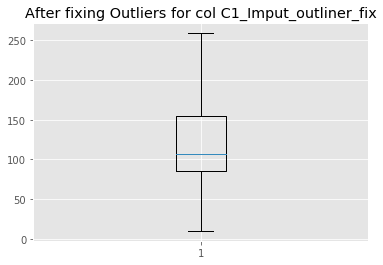

None

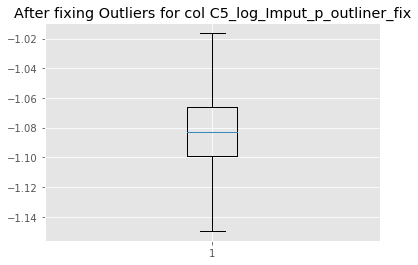

None

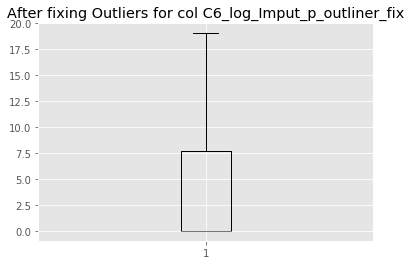

None

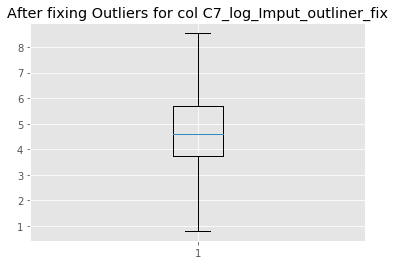

None

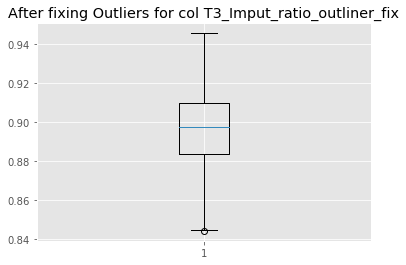

None

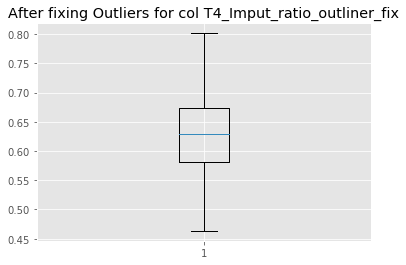

None

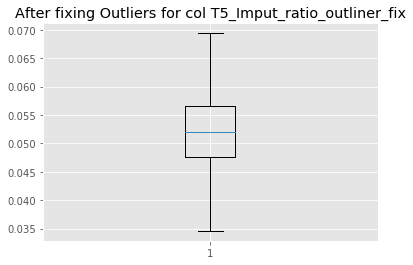

None

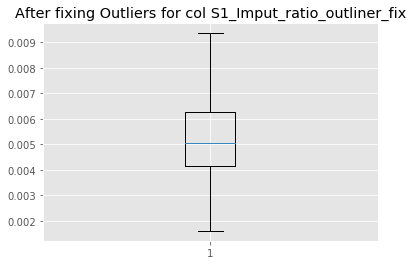

None

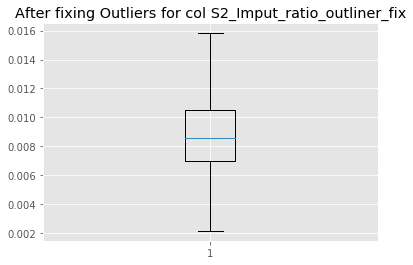

None

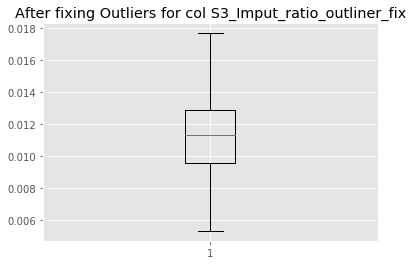

None

In [47]:
outliers_col = ['C1_Imput_outliner_fix' ,'C5_log_Imput_p_outliner_fix', 'C6_log_Imput_p_outliner_fix', 'C7_log_Imput_outliner_fix',  'T3_Imput_ratio_outliner_fix', 'T4_Imput_ratio_outliner_fix','T5_Imput_ratio_outliner_fix', 'S1_Imput_ratio_outliner_fix', 'S2_Imput_ratio_outliner_fix',
       'S3_Imput_ratio_outliner_fix'  ]

for i in outliers_col :
    plt.boxplot(data[i])
    plt.title("After fixing Outliers for col "+data[i].name )
    display(plt.show())

In [48]:
data.skew()[14:]

T4                              1.420226
T5                              1.901119
S1                              2.312743
S2                              3.731903
S3                              3.448485
I3_Imput                        0.222704
div_manufacturing               0.201466
div_other                       1.195205
div_services                    0.843568
T1_Imput                        1.749729
T2_Imput                        1.724434
T3_Imput                        1.706761
T4_Imput                        1.481438
T5_Imput                        1.930338
S1_Imput                        2.329741
S2_Imput                        3.731903
S3_Imput                        3.448485
T4_Imput_ratio                 -0.076681
T3_Imput_ratio                  8.182409
T5_Imput_ratio                  0.435658
S1_Imput_ratio                  0.933906
S2_Imput_ratio                  1.193420
S3_Imput_ratio                  1.387887
P(1Day)_Imput                  12.318970
P(H)_Imput      

In [49]:
data.to_csv('data_skew_imputed_outliers_fixed.csv')
data = pd.read_csv('data_skew_imputed_outliers_fixed.csv')#,usecols = ['Y1', 'Y2' ,'C1' , 'C2' , 'C3_p' ,'C4' , 'C5_p' , 'C6_p' , 
                                     #   'C7' , 'T1' ,'T2' ,'T3','T4' , 'T5', 'S1','S2','S3' ,'div_manufacturing' ,'div_other' ,'div_services' ])
data.columns

Index(['Unnamed: 0', 'I1', 'I2', 'I3', 'P(IPO)', 'P(H)', 'P(L)', 'P(1Day)',
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5',
       'S1', 'S2', 'S3', 'I3_Imput', 'division', 'div_manufacturing',
       'div_other', 'div_services', 'T1_Imput', 'T2_Imput', 'T3_Imput',
       'T4_Imput', 'T5_Imput', 'S1_Imput', 'S2_Imput', 'S3_Imput',
       'T4_Imput_ratio', 'T3_Imput_ratio', 'T5_Imput_ratio', 'S1_Imput_ratio',
       'S2_Imput_ratio', 'S3_Imput_ratio', 'P(1Day)_Imput', 'P(H)_Imput',
       'P(L)_Imput', 'P(IPO)_Imput', 'P(mid)', 'Y1', 'Y2', 'C3_cube_root',
       'C7_log', 'C5_log', 'C6_log', 'C1_Imput', 'C2_Imput',
       'C3_cube_root_Imput', 'C4_Imput', 'C5_log_Imput', 'C6_log_Imput',
       'C7_log_Imput', 'C3_cube_root_Imput_p', 'C5_log_Imput_p',
       'C6_log_Imput_p', 'C1_Imput_outliner_fix',
       'C5_log_Imput_p_outliner_fix', 'C6_log_Imput_p_outliner_fix',
       'C7_log_Imput_outliner_fix', 'T3_Imput_ratio_outliner_fix',
       'T4_Imput_ratio_

In [50]:
#https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num
from sklearn.preprocessing import MinMaxScaler
min_max_col = ['C1_Imput_outliner_fix' ,'C3_cube_root_Imput_p','C4_Imput','C5_log_Imput_p_outliner_fix', 'C6_log_Imput_p_outliner_fix', 'C7_log_Imput_outliner_fix',  'T3_Imput_ratio_outliner_fix', 'T4_Imput_ratio_outliner_fix','T5_Imput_ratio_outliner_fix', 'S1_Imput_ratio_outliner_fix', 'S2_Imput_ratio_outliner_fix',
       'S3_Imput_ratio_outliner_fix',  ]

for i  in min_max_col:
    data[i+'_min_max'] =MinMaxScaler().fit_transform(data[i].values.reshape(-1, 1))
   # data[i+'_min_max'] = data[i].apply(data[i].to_numpy().MinMaxScaler().fit_transform)

In [51]:
'''min_max_col = ['C1_Imput_outliner_fix' ,'C3_cube_root_Imput','C4_Imput','C5_log_Imput_p_outliner_fix', 'C6_log_Imput_p_outliner_fix', 'C7_log_Imput_outliner_fix',  'T3_Imput_ratio_outliner_fix', 'T4_Imput_ratio_outliner_fix','T5_Imput_ratio_outliner_fix', 'S1_Imput_ratio_outliner_fix', 'S2_Imput_ratio_outliner_fix',
       'S3_Imput_ratio_outliner_fix',  ]

for i  in min_max_col:

    data[i+'_min_max'] = (data[i]-data[i].min())/(data[i].max()-data[i].min())'''

"min_max_col = ['C1_Imput_outliner_fix' ,'C3_cube_root_Imput','C4_Imput','C5_log_Imput_p_outliner_fix', 'C6_log_Imput_p_outliner_fix', 'C7_log_Imput_outliner_fix',  'T3_Imput_ratio_outliner_fix', 'T4_Imput_ratio_outliner_fix','T5_Imput_ratio_outliner_fix', 'S1_Imput_ratio_outliner_fix', 'S2_Imput_ratio_outliner_fix',\n       'S3_Imput_ratio_outliner_fix',  ]\n\nfor i  in min_max_col:\n\n    data[i+'_min_max'] = (data[i]-data[i].min())/(data[i].max()-data[i].min())"

In [52]:
np.ptp(data.C1)

/opt/tljh/user/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


2077.0

In [53]:
data.isna().sum()[30:]

T3_Imput                                0
T4_Imput                                0
T5_Imput                                0
S1_Imput                                0
S2_Imput                                0
S3_Imput                                0
T4_Imput_ratio                          0
T3_Imput_ratio                          0
T5_Imput_ratio                          0
S1_Imput_ratio                          0
S2_Imput_ratio                          0
S3_Imput_ratio                          0
P(1Day)_Imput                           0
P(H)_Imput                              0
P(L)_Imput                              0
P(IPO)_Imput                            0
P(mid)                                  0
Y1                                      0
Y2                                      0
C3_cube_root                           24
C7_log                                 60
C5_log                                  0
C6_log                                  0
C1_Imput                          

In [54]:
data.to_csv('data_skew_imputed_outliers_fixed_min_max.csv')


False

In [56]:
''''data = pd.read_csv('data_imputed_outliers_fixed_min_max.csv')#,usecols = ['C3_Imput_p',  
                                                              # 'C1_Imput_outliner_fix_min_max',
                                                              #  'C2_Imput_min_max',
                                                                'C4_Imput_min_max',
                                                                'C5_Imput_p_outliner_fix_min_max',
                                                                'C6_Imput_p_outliner_fix_min_max',
                                                                'C7_Imput_outliner_fix_min_max',
                                                                'T1_Imput_min_max',
                                                                'T2_Imput_min_max',
                                                                'T3_Imput_ratio_outliner_fix_min_max',
                                                                'T4_Imput_ratio_outliner_fix_min_max',
                                                                'T5_Imput_ratio_outliner_fix_min_max',
                                                                'S1_Imput_ratio_outliner_fix_min_max',
                                                                'S2_Imput_ratio_outliner_fix_min_max',
                                                                'S3_Imput_ratio_outliner_fix_min_max','Y1','Y2'])''''

SyntaxError: EOL while scanning string literal (<ipython-input-56-6dd3708c5498>, line 15)

In [ ]:
data = pd.read_csv('data_skew_imputed_outliers_fixed_min_max.csv')

In [ ]:
import pandas as pd
data = pd.read_csv('data_skew_imputed_outliers_fixed_min_max.csv',usecols = ['C3_cube_root_Imput_p', 'Y1','Y2', 
                                                               'C1_Imput_outliner_fix_min_max',
                                                                'C2_Imput',
                                                                'C4_Imput_min_max',
                                                                'C5_log_Imput_p_outliner_fix_min_max',
                                                                'C6_log_Imput_p_outliner_fix_min_max',
                                                                'C7_log_Imput_outliner_fix_min_max',
                                                                'div_manufacturing','div_other','div_services',
                                                                'T3_Imput_ratio_outliner_fix_min_max',
                                                                'T4_Imput_ratio_outliner_fix_min_max',
                                                                'T5_Imput_ratio_outliner_fix_min_max',
                                                                'S1_Imput_ratio_outliner_fix_min_max',
                                                                'S2_Imput_ratio_outliner_fix_min_max',
                                                                'S3_Imput_ratio_outliner_fix_min_max'])

In [ ]:
data.hist(figsize=(25,17))

In [ ]:
data.corr()['Y2']